# Stoneburner, Kurt
- ## DSC 640 - Week 07/08: 
- ## Exercise 4.2: Scatterplots, Bubble Charts and Density Plots/Maps

In [1]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [2]:
#./wk0708/z_wk07_08_birth-rate.csv
#./wk0708/z_wk07_08_birth-rates-yearly.csv
#./wk0708/z_wk07_08_crimerates-by-state-2005.csv
#./wk0708/z_wk07_08_life-expectancy.csv
#./wk0708/z_wk07_08_tv_sizes.txt

In [3]:
# //*** Birth Rates
br_df = pd.read_csv("./wk0708/z_wk07_08_birth-rate.csv")
br_df

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,24.492,23.669,23.058,22.627,22.342,22.177,22.111,22.125,22.192,22.281,22.362,22.406,22.390,22.313,22.172,21.958,21.668,21.300,20.869,20.393,19.886,19.363,18.842,18.332,17.839,17.367,16.911,16.457,15.994,15.515,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,51.920,51.816,51.691,51.548,51.395,51.239,51.092,50.967,50.871,50.810,50.786,50.795,50.833,50.888,50.951,51.016,51.084,51.156,51.237,51.325,51.417,51.510,51.603,51.690,51.760,51.802,51.804,51.754,51.646,51.472,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,52.668,52.376,52.137,51.967,51.875,51.861,51.920,52.033,52.172,52.314,52.444,52.554,52.644,52.721,52.789,52.841,52.880,52.907,52.918,52.903,52.847,52.722,52.490,52.141,51.679,51.123,50.522,49.941,49.427,49.003,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875
3,Albania,40.886,40.312,39.604,38.792,37.913,37.008,36.112,35.245,34.421,33.655,32.947,32.279,31.630,30.985,30.345,29.723,29.138,28.606,28.139,27.736,27.396,27.114,26.870,26.644,26.417,26.172,25.895,25.579,25.217,24.801,24.325,23.788,23.198,22.562,21.885,21.157,20.364,19.510,18.616,17.713,16.850,16.081,15.444,14.962,14.644,14.485,14.464,14.534,14.649
4,Netherlands Antilles,32.321,30.987,29.618,28.229,26.849,25.518,24.280,23.173,22.230,21.472,20.925,20.605,20.484,20.517,20.664,20.864,21.055,21.190,21.238,21.178,21.008,20.746,20.442,20.138,19.860,19.641,19.514,19.477,19.509,19.586,19.651,19.635,19.489,19.187,18.733,18.157,17.515,16.878,16.301,15.809,15.412,15.096,14.824,14.565,14.309,14.051,13.790,13.532,13.281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Samoa,48.202,47.788,47.226,46.491,45.591,44.558,43.447,42.331,41.270,40.297,39.414,38.599,37.821,37.070,36.367,35.763,35.322,35.081,35.054,35.224,35.573,36.068,36.633,37.180,37.632,37.869,37.773,37.323,36.547,35.502,34.323,33.192,32.263,31.634,31.328,31.302,31.453,31.616,31.655,31.504,31.113,30.462,29.612,28.631,27.563,26.464,25.391,24.391,23.508
230,"Yemen, Rep.",54.501,54.516,54.563,54.645,54.761,54.914,55.100,55.310,55.530,55.749,55.951,56.119,56.246,56.329,56.366,56.365,56.343,56.314,56.281,56.240,56.178,56.079,55.922,55.688,55.363,54.934,54.394,53.747,53.005,52.174,51.255,50.250,49.173,48.043,46.885,45.719,44.560,43.427,42.339,41.322,40.407,39.624,38.973,38.445,38.025,37.686,37.393,37.107,36.795
231,South Africa,42.267,41.993,41.610,41.112,40.520,39.883,39.268,38.734,38.317,38.025,37.837,37.709,37.580,37.400,37.153,36.837,36.467,36.077,35.687,35.302,34.919,34.530,34.119,33.675,33.192,32.659,32.066,31.419,30.729,30.010,29.280,28.562,27.874,27.235,26.658,26.158,25.745,25.409,25.132,24.899,24.684,24.458,24.199,23.897,23.550,23.167,22.770,22.387,22.038
232,Zambia,48.112,48.323,48.533,48.734,48.915,49.061,49.156,49.195,49.175,49.097,48.974,48.821,48.655,48.486,48.312,48.117,47.875,47.570,47.198,46.768,46.304,45.837,45.400,45.019,44.709,44.473,44.301,44.174,44.076,44.005,43.971,43.989,44.066,44.199,44.375,44.570,44.758,44.914,45.015,45.048,45.010,44.907,44.755,44.566,44.340,44.067,43.737,43.341,42.879


In [6]:
# //*** Birth Rates Yearly
bry_df = pd.read_csv("./wk0708/z_wk07_08_birth-rates-yearly.csv")
bry_df

,year,rate
0,1960,36.400
1,1961,35.179
2,1962,33.863
3,1963,32.459
4,1964,30.994
...,...,...
9865,2004,30.123
9866,2005,30.067
9867,2006,30.027
9868,2007,29.987


In [49]:
crbs_df = pd.read_csv("./wk0708/z_wk07_08_crimerates-by-state-2005.csv")
crbs_df = crbs_df.iloc[1:]
crbs_df

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255
6,Colorado,3.7,43.4,84.6,264.7,744.8,2735.2,559.5,4660780
7,Connecticut,2.9,20.0,113.0,138.6,437.1,1824.1,296.8,3477416
8,Delaware,4.4,44.7,154.8,428.2,688.9,2144.0,278.5,839906
9,District of Columbia,35.4,30.2,672.1,721.3,649.7,2694.9,1402.3,582049
10,Florida,5.0,37.1,169.4,496.6,926.3,2658.3,423.3,17783868


C:\Users\family\AppData\Local\Temp/ipykernel_14936/4000505857.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(plot_df['state'],rotation=90);


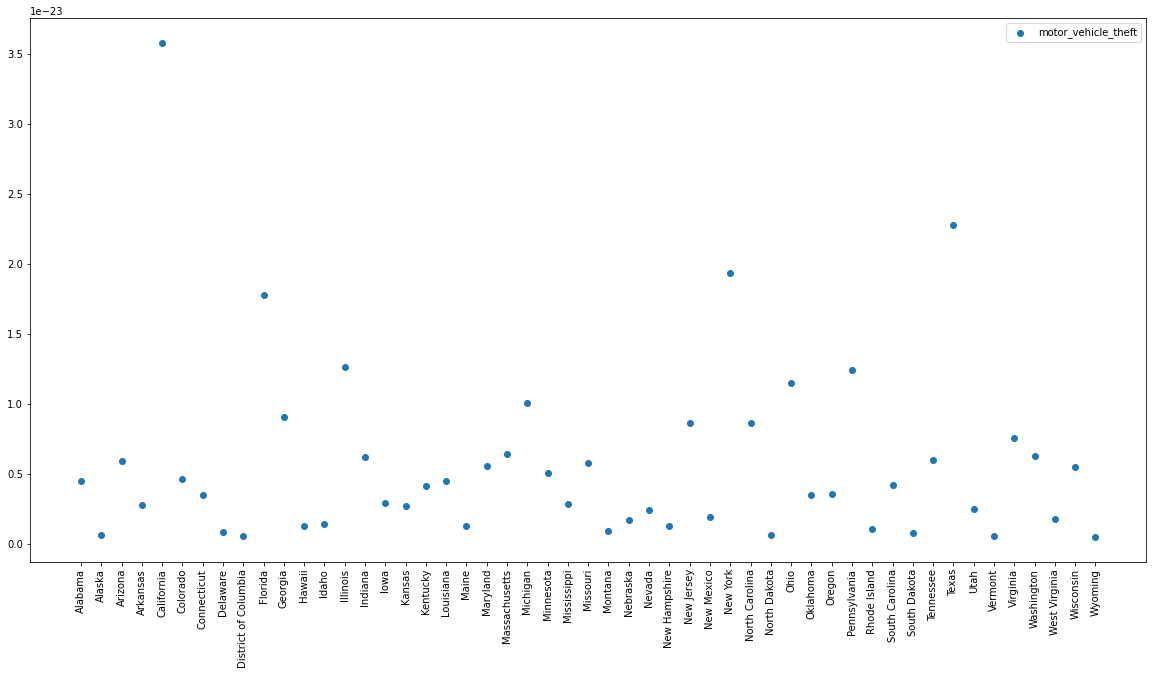

In [73]:
plot_df = crbs_df

pp = {
    'x_fig' : 20,
    'y_fig' : 10,
}
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(pp['x_fig'],pp['y_fig'])

plot_df['population'] = plot_df['population'] / 1

ax.scatter(plot_df['state'],plot_df['population'],
             label=col,
             #colors=colors_palette,
            )


#ax.scatter(plot_df['state'], plot_df['robbery'],
#             label='robbery',
             #colors=colors_palette,
#            )
#plt.title("Household Expenditures: 1984-2008",fontsize=30)
#plt.legend()
#plt.legend(reversed(plt.legend().legendHandles), reversed(plot_dict.keys()),loc='upper left')
#ax.set_ylabel("Expenses ($)",fontsize=15)
#ax.tick_params(axis='both', labelsize=12)
#plt.text(0,-.1,'"Python: Stacked Area Chart"', size=pp['fontsize'], transform=ax.transAxes)

#outfilename='output_wk05_06_python_area_stacked_expenditures.png'
#out_file_for_print.append(outfilename)
#fig.savefig(outfilename)
ax.set_xticklabels(plot_df['state'],rotation=90);
plt.legend()
plt.show()

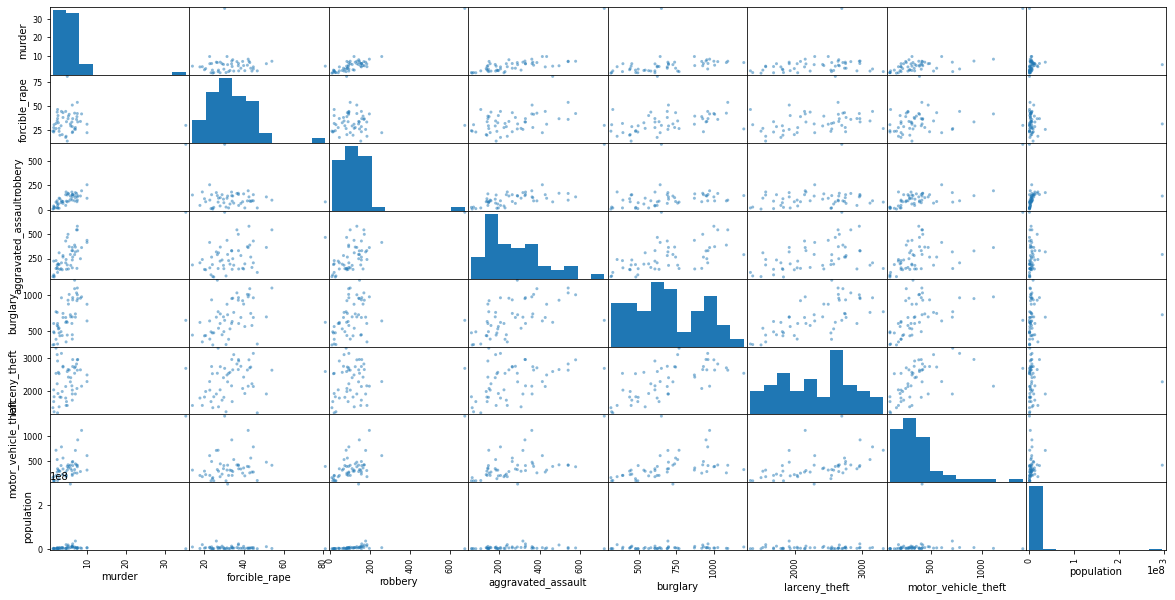

In [41]:
pd.plotting.scatter_matrix(crbs_df)
fig = plt.gcf()
fig.set_size_inches(pp['x_fig'],pp['y_fig'])
plt.show()

In [8]:
le_df = pd.read_csv("./wk0708/z_wk07_08_life-expectancy.csv")
le_df

,country,year,expectancy
0,Afghanistan,2008,42
1,Albania,2008,73
2,Algeria,2008,71
3,Angola,2008,46
4,Antigua and Barbuda,2008,74
...,...,...,...
182,Venezuela (Bolivarian Republic of),2008,75
183,Viet Nam,2008,73
184,Yemen,2008,64
185,Zambia,2008,48


In [10]:
# //*** CODE HERE

tv_df = pd.read_csv("./wk0708/z_wk07_08_tv_sizes.txt",sep='\t')
tv_df


,year,size
0,2009,52
1,2009,40
2,2009,65
3,2009,46
4,2009,55
...,...,...
759,2002,65
760,2002,42
761,2002,53
762,2001,50
